In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 7.8 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 21.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=6de47e64674e00d95d3f2933e83c0f03ca4c146c725953bc399a59618ad3b063
  Stored in directory: /Users/admin/Library/Caches/pip/wheels/a6/5e/0f/8319805c4115320e0d3e8fb5799b114a2e4c4a3d6c7e523b06
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Define the stock symbol and fetch historical data
stock_symbol = 'AAPL'  # Example: Apple Inc.
data = yf.download(stock_symbol, start='2020-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
pd.DataFrame(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,173.629776,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.618866,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.594498,79144300


In [4]:
# Calculate 50-day Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()

In [5]:
# Calculate 20-day Exponential Moving Average (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [8]:
data['EMA_20']

Date
2020-01-02     75.087502
2020-01-03     75.017977
2020-01-06     75.011503
2020-01-07     74.972075
2020-01-08     75.050687
                 ...    
2021-12-23    170.028505
2021-12-27    171.009600
2021-12-28    171.798209
2021-12-29    172.520285
2021-12-30    173.061210
Name: EMA_20, Length: 504, dtype: float64

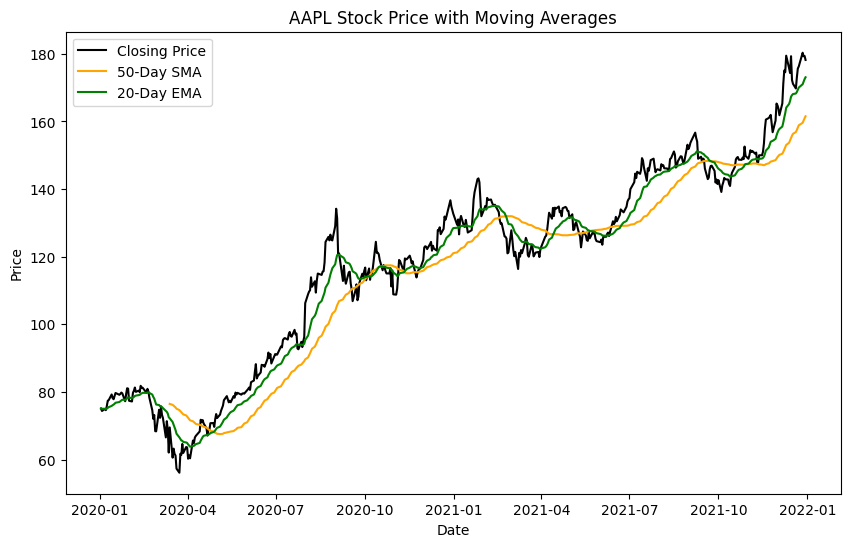

In [12]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='black')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_symbol} Stock Price with Moving Averages')
plt.legend()
plt.show()